# Working with Camera and Networks

This notebook explores using a webcamera with a network.

In [1]:
from conx.widgets import CameraWidget
import conx as cx

Using TensorFlow backend.
ConX, version 3.7.5


In [2]:
camera = CameraWidget()

<IPython.core.display.Javascript object>

In [3]:
camera

CameraWidget()

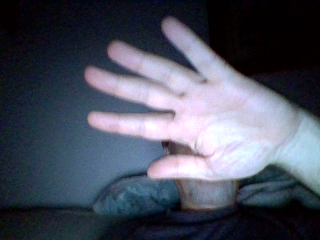

In [4]:
image = camera.get_image()
image

In [5]:
image.save("camera.jpg")

In [6]:
data = camera.get_data()

In [7]:
data.shape

(240, 320, 3)

In [8]:
net = cx.Network("Camera Network")
net.add(cx.ImageLayer("camera", (240, 320), 3),
        cx.Conv2DLayer("conv2d", 32, (3,3)),
        cx.MaxPool2DLayer("maxpool", (2,2)),
        cx.FlattenLayer("flatten"),
        cx.Layer("output", 10))
net.connect()
net.compile(error="mse", optimizer="adam")

In [9]:
net.dataset.append(data, cx.to_categorical(1, 10))

In [10]:
net.dashboard()

Dashboard(children=(Accordion(children=(HBox(children=(VBox(children=(Select(description='Dataset:', index=1, …


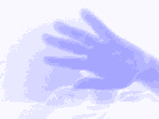
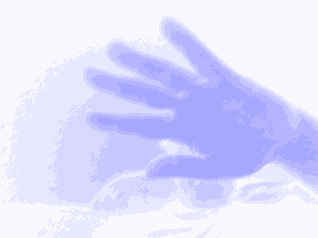
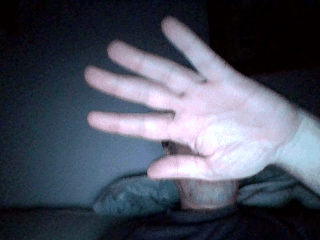

In [11]:
net.picture(camera.get_data())